In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv('/Users/aadityajoshi/Downloads/archive-13/A_Z Handwritten Data/A_Z Handwritten Data.csv')

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [177]:
label = df['0']
data = df.drop('0',axis=1)

In [162]:
label.nunique()

26

In [192]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,label,test_size=0.1,stratify=label)

In [193]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1,stratify=y_train)

In [182]:
y_train.shape

(301684, 26)

In [166]:
X_test.shape

(37245, 784)

In [167]:
from tensorflow.keras.utils import to_categorical

In [194]:
y_train = to_categorical(y_train.values,num_classes=26)
#y_train = np.argmax(y_train, axis=1)

In [186]:
y_test = to_categorical(y_test.values,num_classes=26)
y_test = np.argmax(y_test, axis=1)

In [195]:
y_val = to_categorical(y_val.values,num_classes=26)
#y_val = np.argmax(y_val, axis=1)

In [196]:
X_train = X_train.values
X_test = X_test.values
X_val = X_val.values

In [197]:
X_train = X_train/255.
X_test = X_test/255.
X_val = X_val/255.

In [198]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)

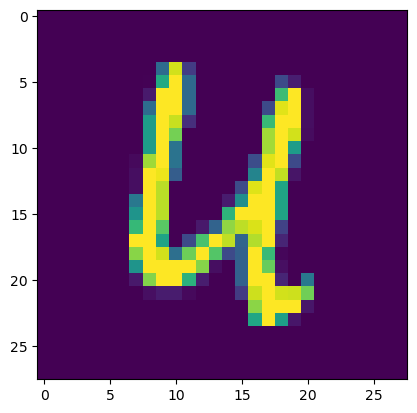

In [15]:
import random
plt.imshow(X_train[random.randint(0,len(X_train)-1)])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [231]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input,Conv2D,Flatten,BatchNormalization,Activation,MaxPooling2D,ReLU

### LeNet Architechture

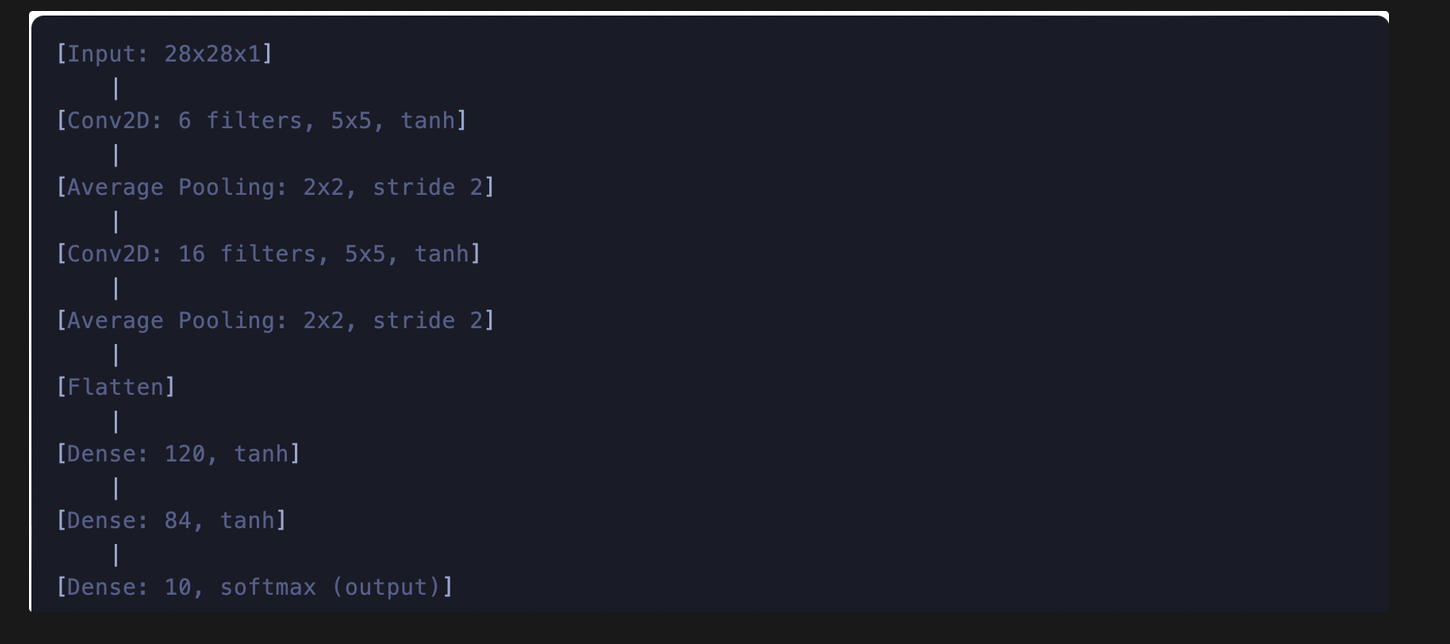

In [42]:
def create_LeNet5():
    #model
    model = Sequential()
    #input layer
    model.add(Input(shape=(28,28,1)))
    #conv layer
    model.add(Conv2D(filters=6,kernel_size=(5,5),strides=(1,1),padding='valid',activation='relu'))
    # max pooling instead of avg pool
    model.add(MaxPooling2D((2,2)))
    #Conv 2
    model.add(Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),padding='valid',activation='relu'))
    #max pool 2
    model.add(MaxPooling2D(2,2))
    #flatten
    model.add(Flatten())
    #Dense
    model.add(Dense(120,activation='relu'))
    #Dense
    model.add(Dense(84,activation='relu'))
    #output
    model.add(Dense(26,activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [111]:
from tensorflow.keras.backend import clear_session
clear_session()
LeNet_5 = create_LeNet5()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         2,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,786 (178.85 KB)

 Trainable params: 45,786 (178.85 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
with tf.device('/GPU:0'):
    history = LeNet_5.fit(X_train, y_train, epochs=25,batch_size=128,validation_data=(X_val,y_val))

Epoch 1/25
2357/2357 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8451 - loss: 0.5532 - val_accuracy: 0.9706 - val_loss: 0.0965
Epoch 2/25
2357/2357 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9738 - loss: 0.0916 - val_accuracy: 0.9759 - val_loss: 0.0783
Epoch 3/25
2357/2357 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9808 - loss: 0.0668 - val_accuracy: 0.9822 - val_loss: 0.0587
Epoch 4/25
2357/2357 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9841 - loss: 0.0532 - val_accuracy: 0.9847 - val_loss: 0.0509
Epoch 5/25
2357/2357 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9865 - loss: 0.0454 - val_accuracy: 0.9858 - val_loss: 0.0469
Epoch 6/25
2357/2357 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9887 - loss: 0.0377 - val_accuracy: 0.9867 - val_loss: 0.0439
Epoch 7/25
2357/2357 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9898 - loss: 0.0335 - val_accuracy: 0.9838 - val_loss: 0.0532
Epoch 8/25
2357/2357 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9904 - loss: 0

In [113]:
loss_df = pd.DataFrame(history.history)

<Axes: >

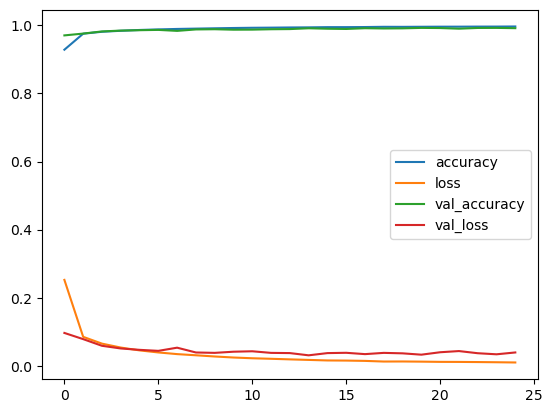

In [114]:
loss_df.plot()

In [116]:
prediction = LeNet_5.predict(X_test)

1164/1164 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step


In [118]:
prediction = prediction.argmax(axis=1)

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1387
           1       0.99      1.00      0.99       867
           2       0.99      0.99      0.99      2341
           3       0.97      0.97      0.97      1013
           4       1.00      0.99      0.99      1144
           5       0.95      0.97      0.96       116
           6       0.99      0.99      0.99       576
           7       0.99      0.95      0.97       722
           8       0.98      0.99      0.99       112
           9       0.99      0.99      0.99       849
          10       0.99      0.98      0.98       560
          11       0.99      0.99      0.99      1159
          12       0.98      0.99      0.99      1234
          13       0.98      1.00      0.99      1901
          14       0.99      0.99      0.99      5782
          15       0.99      0.99      0.99      1934
          16       0.99      0.98      0.99       581
          17       0.99    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Letter predicted: Y


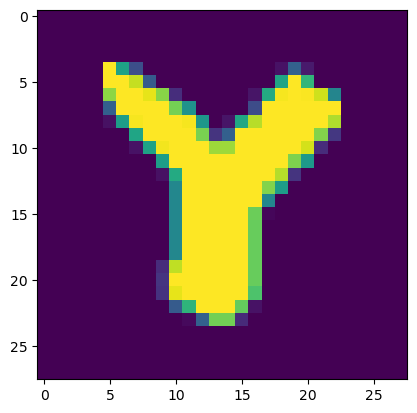

In [147]:
import random 
random_int = random.randint(1,37245)
img = X_test[random_int]
img = img.reshape(28,28,1)
plt.imshow(img)
pred = LeNet_5.predict(img.reshape(-1,28,28,1))
predicted_classe = np.argmax(pred, axis=1)
print(f'Letter predicted: {num_to_letter[predicted_classe[0]]}')

In [136]:
num_to_letter = {i: chr(65 + i) for i in range(26)}

### VGG inspired Model
#### 2 conv + Maxpool -> 2 conv+Maxpool -> 2 conv+MaxPool -> Flatten ->Dense

In [204]:
def create_vgg():
    #create model
    model = Sequential()
    model.add(Input(shape=(28,28,1)))
    #First Conv -8n
    model.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same',strides=(1,1)))
    model.add(Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same',strides=(1,1)))
    #first maxpool
    model.add(MaxPooling2D(2,2))
    #Second Conv -16n
    model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same',strides=(1,1)))
    model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same',strides=(1,1)))
    #second maxpool
    model.add(MaxPooling2D(2,2))
    #Third Conv -32n
    model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same',strides=(1,1)))
    model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same',strides=(1,1)))
    #Third maxpool
    model.add(MaxPooling2D(2,2))
    #flatten
    model.add(Flatten())
    #FC layer 64- 1
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.1))
    #FC layer 64- 2
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.1))
    #FC layer 64- 3
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.1))
    # Output layer
    model.add(Dense(26,activation='softmax'))
    #compile
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    return model
    

In [205]:
VGG = create_vgg()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 14, 14, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │        37,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,178 (719.45 KB)

 Trainable params: 184,178 (719.45 KB)

 Non-trainable params: 0 (0.00 B)

In [206]:
history = VGG.fit(X_train, y_train, epochs=25,batch_size=128,validation_data=(X_val,y_val))

Epoch 1/25
2357/2357 ━━━━━━━━━━━━━━━━━━━━ 50s 20ms/step - accuracy: 0.8335 - loss: 0.5738 - val_accuracy: 0.9761 - val_loss: 0.0811
Epoch 2/25
2357/2357 ━━━━━━━━━━━━━━━━━━━━ 47s 20ms/step - accuracy: 0.9758 - loss: 0.0840 - val_accuracy: 0.9825 - val_loss: 0.0615
Epoch 3/25
2357/2357 ━━━━━━━━━━━━━━━━━━━━ 44s 19ms/step - accuracy: 0.9816 - loss: 0.0642 - val_accuracy: 0.9857 - val_loss: 0.0494
Epoch 4/25
2357/2357 ━━━━━━━━━━━━━━━━━━━━ 46s 20ms/step - accuracy: 0.9841 - loss: 0.0547 - val_accuracy: 0.9854 - val_loss: 0.0475
Epoch 5/25
2357/2357 ━━━━━━━━━━━━━━━━━━━━ 46s 19ms/step - accuracy: 0.9860 - loss: 0.0489 - val_accuracy: 0.9889 - val_loss: 0.0380
Epoch 6/25
2357/2357 ━━━━━━━━━━━━━━━━━━━━ 46s 19ms/step - accuracy: 0.9874 - loss: 0.0426 - val_accuracy: 0.9896 - val_loss: 0.0366
Epoch 7/25
2357/2357 ━━━━━━━━━━━━━━━━━━━━ 46s 19ms/step - accuracy: 0.9889 - loss: 0.0385 - val_accuracy: 0.9901 - val_loss: 0.0348
Epoch 8/25
2357/2357 ━━━━━━━━━━━━━━━━━━━━ 46s 20ms/step - accuracy: 0.9890 -

In [207]:
loss_df = pd.DataFrame(history.history)

<Axes: >

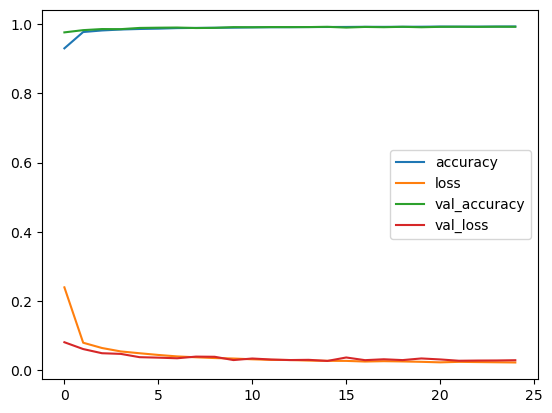

In [208]:
loss_df.plot()

In [211]:
prediction = VGG.predict(X_test)

1164/1164 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [212]:
prediction = prediction.argmax(axis=1)

In [213]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1387
           1       0.99      0.99      0.99       867
           2       0.99      1.00      0.99      2341
           3       0.98      0.95      0.96      1013
           4       0.99      0.99      0.99      1144
           5       0.97      0.98      0.97       116
           6       0.99      0.96      0.98       576
           7       0.99      0.98      0.98       722
           8       0.99      0.98      0.99       112
           9       1.00      0.96      0.98       849
          10       0.98      0.99      0.98       560
          11       0.99      0.99      0.99      1159
          12       1.00      0.99      0.99      1234
          13       1.00      0.98      0.99      1901
          14       0.99      1.00      0.99      5783
          15       1.00      0.99      0.99      1934
          16       0.98      0.99      0.98       581
          17       0.99    

In [214]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))

0.9912739965095986


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Letter predicted: W


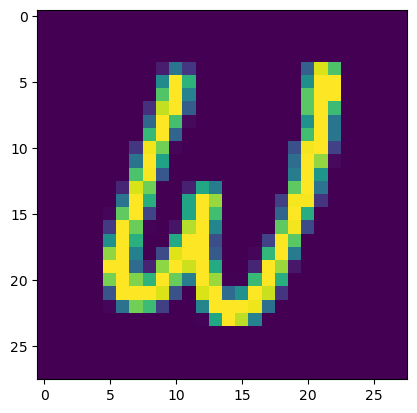

In [228]:
random_int = random.randint(1,37245)
img = X_test[random_int]
img = img.reshape(28,28,1)
plt.imshow(img)
pred = VGG.predict(img.reshape(-1,28,28,1))
predicted_classe = np.argmax(pred, axis=1)
print(f'Letter predicted: {num_to_letter[predicted_classe[0]]}')

### MobileNet

In [236]:
from tensorflow.keras.layers import DepthwiseConv2D,GlobalAveragePooling2D

In [238]:
def create_MobileNet():
    # Create Sequential Model
    model = Sequential()
    # Input Layer
    model.add(Input(shape=(28,28,1)))
    # 1st Normal Conv
    model.add(Conv2D(filters=32,kernel_size=3,strides=(2,2),padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    # 1st DepthWiseConv
    model.add(DepthwiseConv2D(kernel_size=3,padding='same',strides=(1,1)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(kernel_size=1,strides=(1,1),filters=32,padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    # 2nd Normal Conv
    model.add(Conv2D(kernel_size=1,filters=64,strides=(1,1),padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    # 2nd DepthwiseConv
    model.add(DepthwiseConv2D(kernel_size=3,padding='same',strides=(2,2)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(kernel_size=1,strides=(1,1),filters=64,padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    # 3rd Normal Conv
    model.add(Conv2D(kernel_size=1,filters=128,strides=(1,1),padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    # 3rd DepthwiseConv
    model.add(DepthwiseConv2D(kernel_size=3,padding='same',strides=(1,1)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(kernel_size=1,strides=(1,1),filters=128,padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    # 4th Normal Conv
    model.add(Conv2D(kernel_size=1,filters=128,strides=(1,1),padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    # 4th DepthwiseConv
    model.add(DepthwiseConv2D(kernel_size=3,padding='same',strides=(2,2)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(kernel_size=1,strides=(1,1),filters=128,padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    # 5th Normal Conv
    model.add(Conv2D(kernel_size=1,filters=256,strides=(1,1),padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    # 5th DepthwiseConv
    model.add(DepthwiseConv2D(kernel_size=3,padding='same',strides=(1,1)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(kernel_size=1,strides=(1,1),filters=256,padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    # 6th Normal Conv
    model.add(Conv2D(kernel_size=1,filters=256,strides=(1,1),padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    # 6th DepthwiseConv
    model.add(DepthwiseConv2D(kernel_size=3,padding='same',strides=(2,2)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(kernel_size=1,strides=(1,1),filters=256,padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    # 7th Normal Conv
    model.add(Conv2D(kernel_size=1,filters=512,strides=(1,1),padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    # 5x in dw + normalconv
    for i in range(5):
        model.add(DepthwiseConv2D(kernel_size=3,padding='same',strides=(1,1)))
        model.add(BatchNormalization())
        model.add(ReLU())
        model.add(Conv2D(kernel_size=1,strides=(1,1),filters=512,padding='same'))
        model.add(BatchNormalization())
        model.add(ReLU())
        # Normal Conv
        model.add(Conv2D(kernel_size=1,filters=512,strides=(1,1),padding='same'))
        model.add(BatchNormalization())
        model.add(ReLU())
    #depthwiseConv s2
    model.add(DepthwiseConv2D(kernel_size=3,padding='same',strides=(2,2)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(kernel_size=1,strides=(1,1),filters=512,padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    #Nomral conv
    model.add(Conv2D(kernel_size=1,filters=1024,strides=(1,1),padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    #depth wise s2
    model.add(DepthwiseConv2D(kernel_size=3,padding='same',strides=(2,2)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(kernel_size=1,strides=(1,1),filters=1024,padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    #normal conv
    model.add(Conv2D(kernel_size=1,filters=1024,strides=(1,1),padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    #AVg pool
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    #FC layer
    model.add(Dense(1000,activation='relu'))
    #output layer 5
    model.add(Dense(26,activation='softmax'))
    
    #compiling model
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #summary
    model.summary()
    #return model
    return model

In [239]:
MobileNet = create_MobileNet()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_88 (Conv2D)              │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_82          │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_81 (ReLU)                 │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_26             │ (None, 14, 14, 32)     │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_83          │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_82 (ReLU)                 │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 14, 14, 32)     │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_84          │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_83 (ReLU)                 │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 14, 14, 64)     │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_85          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_84 (ReLU)                 │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_27             │ (None, 7, 7, 64)       │           640 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_86          │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_85 (ReLU)                 │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 7, 7, 64)       │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_87          │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_86 (ReLU)                 │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 7, 7, 128)      │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_88          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 7,105,458 (27.11 MB)

 Trainable params: 7,073,650 (26.98 MB)

 Non-trainable params: 31,808 (124.25 KB)

In [242]:
MobileNet.fit(X_train, y_train, epochs=15,batch_size=256,validation_data=(X_val,y_val))

Epoch 1/15
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 365s 307ms/step - accuracy: 0.8501 - loss: 0.5093 - val_accuracy: 0.7727 - val_loss: 1.0136
Epoch 2/15
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 320s 271ms/step - accuracy: 0.8898 - loss: 0.3788 - val_accuracy: 0.8482 - val_loss: 0.6316
Epoch 3/15
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 323s 274ms/step - accuracy: 0.9171 - loss: 0.2927 - val_accuracy: 0.8167 - val_loss: 0.7772
Epoch 4/15
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 338s 287ms/step - accuracy: 0.9276 - loss: 0.2554 - val_accuracy: 0.7717 - val_loss: 1.0082
Epoch 5/15
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 358s 304ms/step - accuracy: 0.9395 - loss: 0.2176 - val_accuracy: 0.7180 - val_loss: 1.4311
Epoch 6/15
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 319s 270ms/step - accuracy: 0.9226 - loss: 0.2739 - val_accuracy: 0.7903 - val_loss: 0.8368
Epoch 7/15
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 343s 291ms/step - accuracy: 0.9396 - loss: 0.2136 - val_accuracy: 0.9361 - val_loss: 0.2372
Epoch 8/15
1179/1179 ━━━━━━━━━━━━━━━━━━━━ 352s 298ms/step - ac

In [246]:
loss_mobile = pd.DataFrame(MobileNet.history.history)

<Axes: >

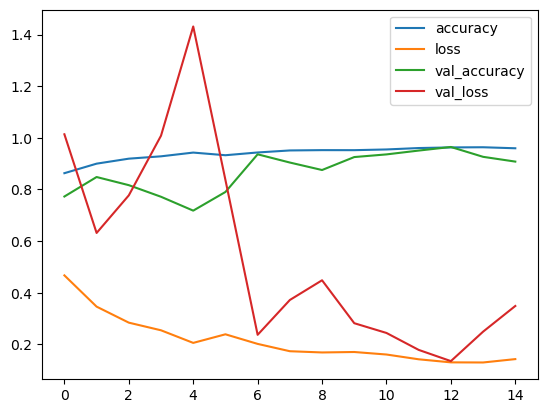

In [247]:
loss_mobile.plot()

In [248]:
pred_mobile = MobileNet.predict(X_test)

1164/1164 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step


In [ ]:
pred_mobile = pred_mobile.argmax(axis=)